In [ ]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

from google.colab import files

In [ ]:
#5000+65+330+50+120+900+100+99+197+250+250+30+150+40+119+30+50+65+50+35+100+40+105+300+150+1000+1000+180+30+180+120+30+50+20+30+110+30+375+20+1000
uploaded=files.upload()


Saving mudasir.jpeg to mudasir.jpeg


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

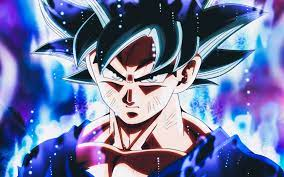

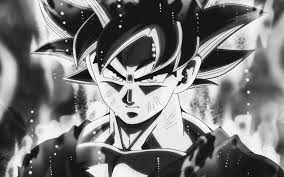

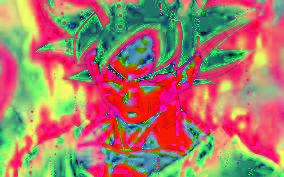

In [ ]:
q#12420-12800
#image=cv2.imread('download.jpg',0) # imread take two arg file path and mode (grey,rgb,alpha channel)
image=cv2.imread('download.jpg')
cv2_imshow(image)
#print(image.shape)
# conver image into gray scale
grey =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(grey)
# HSV image
HSV=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
cv2_imshow(HSV)

# Edge Detection

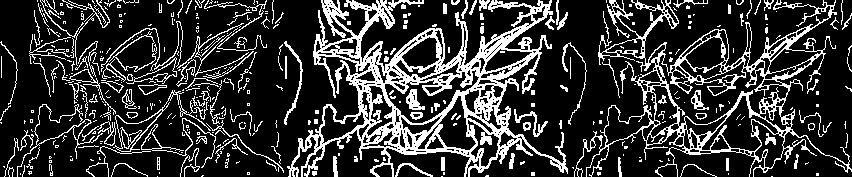

In [ ]:
image =cv2.imread('download.jpg')
# canny edge detection it take 2 arg 1) path 2) size of a filter we are using it and it run on grey scale
grey =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
canny_image =cv2.Canny(grey ,150,200)
#cv2_imshow(canny_image)
# Erosion and dilation

kernel=np.ones((2,2),np.uint8)
# dilation
dilatea_image=cv2.dilate(canny_image,kernel,iterations=1)
#cv2_imshow(dilatea_image)

erode_image=cv2.erode(dilatea_image,kernel ,iterations=1)
#cv2_imshow(erode_image)
# erode is use to reduce the noise of the image

display= np.hstack((canny_image,dilatea_image,erode_image))
cv2_imshow(display)

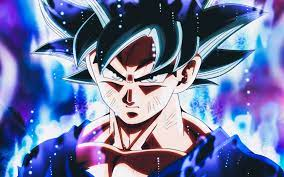

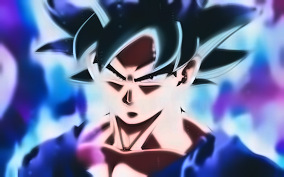

In [ ]:
 # Denoising
 cv2_imshow(image)
 dst1 =cv2.fastNlMeansDenoisingColored(image,None,30,20,7,15)

 cv2_imshow(dst1)


# DRAWING SHAPE AND WRITING

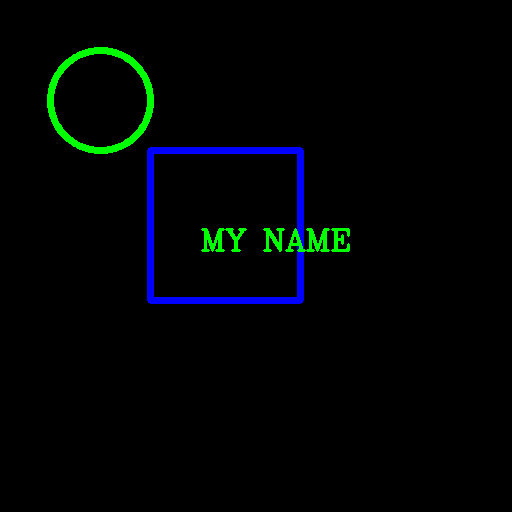

In [ ]:
# going to make metrix using np which has 3 channel
# np.uint8(unsign integer of byte size 8) means values will be between 0-255
img =np.zeros((512,512,3),np.uint8)
# draw a circle
cv2.circle(img,(100,100),50,(0,255,0),5)
cv2.rectangle(img,(150,150),(300,300),(255,0,0),5)
cv2.putText(img,'MY NAME' , (200,250),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
cv2_imshow(img)


# COLOR DETECTION

In [ ]:
uploaded=files.upload()


Saving shapes.png to shapes.png


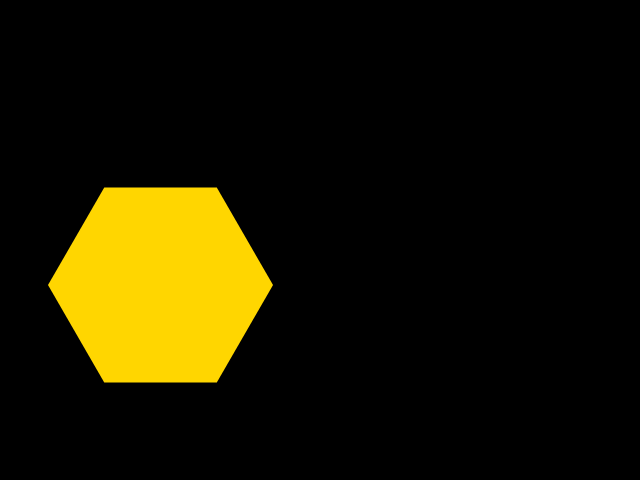

In [ ]:
image =cv2.imread('shapes.png')
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)


# Blue Color Triangle
# lower_hue = np.array([65,0,0])
# upper_hue = np.array([110, 255,255])

# Red Color
# lower_hue = np.array([0,0,0])
# upper_hue = np.array([20,255, 255])

# Green Color
# lower_hue = np.array([46,0,0])
# upper_hue = np.array([91,255,255])

# Yellow Color
lower_hue = np.array([21,0,0])
upper_hue = np.array([45,255,255])

mask = cv2.inRange(hsv,lower_hue,upper_hue)
# cv2_imshow(mask)


# to extract original color from rectangle which blue use bitwise operation
result= cv2.bitwise_and(image,image,mask=mask)
cv2_imshow(result)

# FACE DETECTION

In [ ]:
uploaded=files.upload()

Saving person.jpg to person.jpg


[[208  73 161 161]]


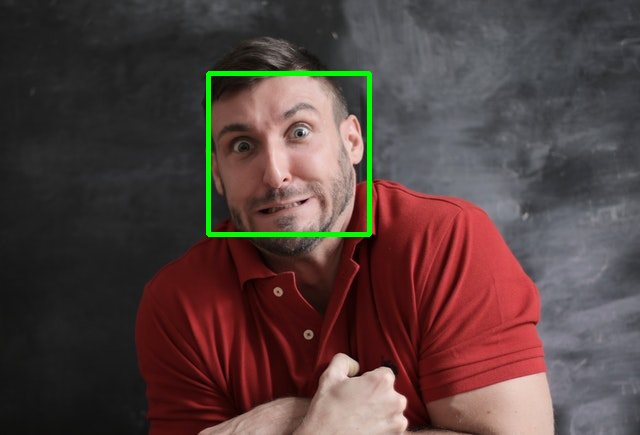

In [ ]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# cascade classifer only work on grey scale

img = cv2.imread('person.jpg')
face = face_cascade.detectMultiScale(img,1.3,5)
print(face)
for (x,y,w,h) in face:
  cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,0),3)
cv2_imshow(img)

# SHAPE DETECTION

In [ ]:
uploaded=files.upload()

Saving video.mp4 to video.mp4


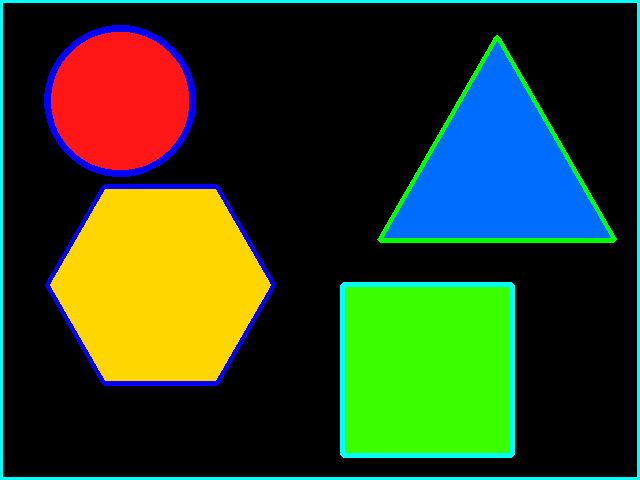

In [ ]:
img =cv2.imread('shapes.png')
grey =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh =cv2.threshold(grey,50,255,1)
#cv2_imshow(thresh)
# to identify the boarder of these pixel

conture,h =cv2.findContours(thresh,1,2)
for cont in conture:
  # loop through contour and find which we want
  approx = cv2.approxPolyDP(cont,0.01*cv2.arcLength(cont,True),True) # cont = which cont we are looking into it
  n= len(approx)
  if n>9:
    cv2.drawContours(img, [cont] , 0,255,5) # drawContour (on the img called img ,drwa the contour using what we have inside cont,start,end ,thickness)
  elif n==3:
    cv2.drawContours(img,[cont],0,(0,255,0),3)
  elif n==4:
    cv2.drawContours(img,[cont],0,(255,255,0),3)
  elif n==6:
    cv2.drawContours(img,[cont],0,(255,0,0),3)
cv2_imshow(img)

# BALL TRACKING

In [ ]:
cap= cv2.VideoCapture('video.mp4')
out = cv2.VideoWriter('output.avi' , cv2.VideoWriter_fourcc('M','J','P','G'),10,(1920,1080)) # 10 here is frame per sec and (1920,1080) is resolution
ball=[]
while cap.isOpened():
  ret , frame =cap.read()
  if ret is False:
    break

  hsv = cv2.cvtColor( frame, cv2.COLOR_BGR2HSV)
  lower_hue = np.array([21,0,0])
  upper_hue = np.array([45,255,255])
  mask = cv2.inRange(hsv , lower_hue , upper_hue)

  # where the yello color is residing to do that we use findcontour

  (contour,_) = cv2.findContours(mask ,cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)

  center = None
  if len(contour) > 0:
    # now where my contour is located to do we find out first which is biggest countour of our image
    c =max(contour , key = cv2.contourArea) # contour area give different type of contour and their area

    # Now find where that contour is loacated what is cordinate

    ((x,y), radius) = cv2.minEnclosingCircle(c)

    # now we have to identify where is the moment file is
    M = cv2.moments(c) # moment tell where is the center of the contour is

    try:
      center = (int(M['m10']/M['m00']), int(M['m01'] / M['m00']))
      cv2.circle(frame , center , 10 , (255,255,0) , -1)

      # center specifying one location one point of the ball but we want to identify different type of contour that are available so we have to save it at every instance

      ball.append(center)
    except:
      pass
    # use the ball array to draw or track the moment
    if len(ball) > 2:  # 2 because line has only two point
      for i in range(1 , len(ball)):
        # draw the line on the frame using ball[i] initial cordinate
        cv2.line(frame , ball[i-1], ball[i], (0,0,255),5)
  out.write(frame)
out.release()



In [ ]:
!git clone https://github.com/misbah4064/face_recognition.git
!pip install face_recognition
%cd face_recognition

Cloning into 'face_recognition'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 5), reused 23 (delta 3), pack-reused 0
Unpacking objects: 100% (26/26), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 28 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=7aa3cf187339fca29a3772045eef9c5bb7e9ed4030db3bca05f6c141f184a275
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
/content/face_recognition


# creating encoding profil using known face images

In [ ]:
import face_recognition

In [ ]:
# creating encoding profile
face1=face_recognition.load_image_file('/content/face_recognition/elon.jpg')
face1_encoding = face_recognition.face_encodings(face1)[0] # [0] mean zeoth index of the image

# face2= face_recognition.load_image_file('Maqbool1.jpg')
# face2_encoding = face_recognition.face_encodings(face2)[0]

face3= face_recognition.load_image_file('/content/face_recognition/Donald Trump.jpg')
face3_encoding = face_recognition.face_encodings(face3)[0]

# make them in aarray so that we can call it individual
# , face2_encoding,face3_encoding

known_face_encoding= [face1_encoding ,face3_encoding]

known_face_name = ['Elon','Trump']



In [ ]:
!git clone https://github.com/misbah4064/face_recognition.git
!pip install face_recognition
%cd face_recognition

import face_recognition
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
from google.colab import files


face1=face_recognition.load_image_file('ertugrul.jpeg')
face1_encode = face_recognition.face_encodings(face1)[0]
face2= face_recognition.load_image_file('Donald Trump.jpg')
face2_encode=face_recognition.face_encodings(face2)[0]

known_face =[face1_encode,face2_encode]
known_face_label = ['ertugul' , 'Donald Trump']

file_name='unknown_er.jpg'
unknown_image=face_recognition.load_image_file(file_name)
unknown_image_read =cv2.imread(file_name)
face_location = face_recognition.face_locations(unknown_image)
face_encoding = face_recognition.face_encodings(unknown_image , face_location)

for (top, right , bottom ,left) ,face_en in zip(face_location,face_encoding):
  matches = face_recognition.compare_faces(known_face,face_en )

  name='unknown'

  face_distance = face_recognition.face_distance(known_face , face_en)
  best_match = np.argmin(face_distance)
  if matches[best_match]:
    name=known_face_label[best_match]
  cv2.rectangle(unknown_image_read,(left,top),(right,bottom) , (0,255,0) , 2)
  cv2.putText(unknown_image_read , name , (left,top-20) , cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2, cv2.LINE_AA)
cv2_imshow(unknown_image_read)

fatal: destination path 'face_recognition' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/face_recognition


In [ ]:
file_name = 'IMG_20201129_013728.jpg'
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_draw = cv2.imread(file_name)
face_location = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image , face_location)

for (top, right , bottom ,left ) ,face_encoding in zip(face_location, face_encodings):
  matches =  face_recognition.compare_faces(known_face_encoding , face_encoding)

  name ='unknown'

  face_distance = face_recognition.face_distance(known_face_encoding,face_encoding)
  best_match_index = np.argmin(face_distance)

  if matches[best_match_index]:
    name = known_face_name[best_match_index]
  cv2.rectangle(unknown_image_draw,(left,top) , (right,bottom) ,  (0,255,0),2)
  cv2.putText(unknown_image_draw , name , (left,top-20) , cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2, cv2.LINE_AA)
cv2_imshow(unknown_image_draw)


In [ ]:
 upload=files.upload()

Saving goku.jpg to goku.jpg


In [ ]:
# 80+60+1460+50+60+60+70+50+100+200+120+180+240+65+40+90+10+60+120+150+40+1000+72+30+20+50+50

4527

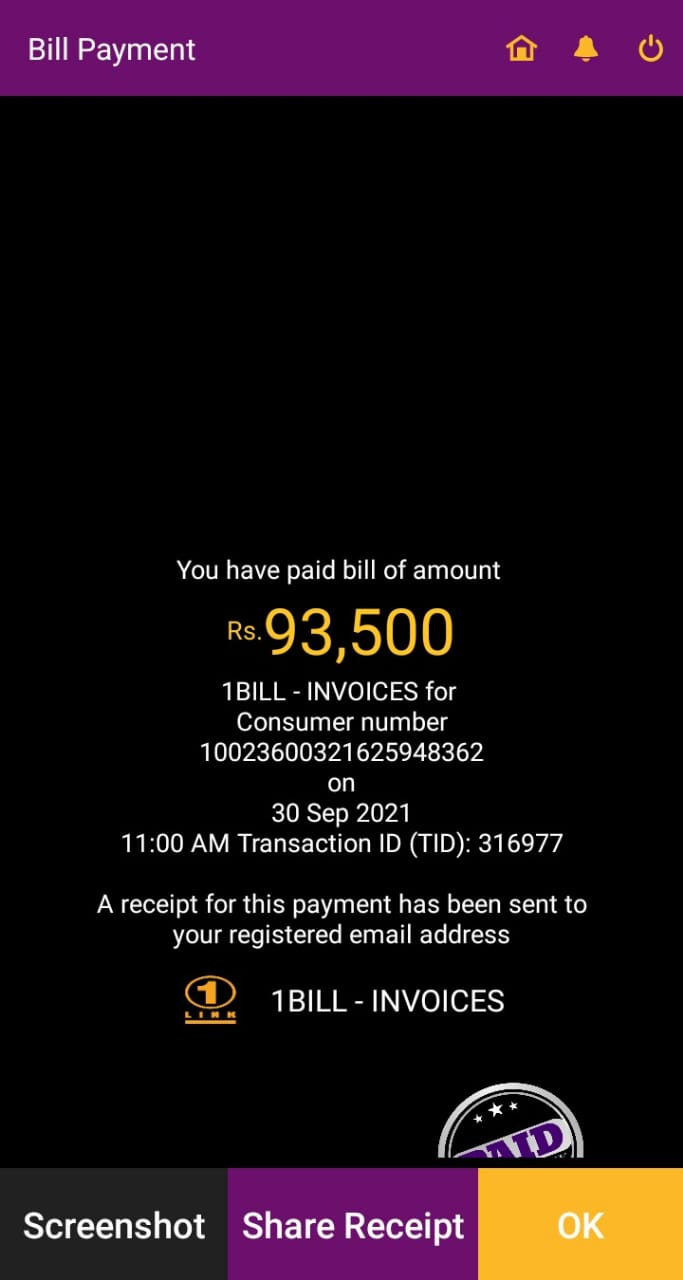

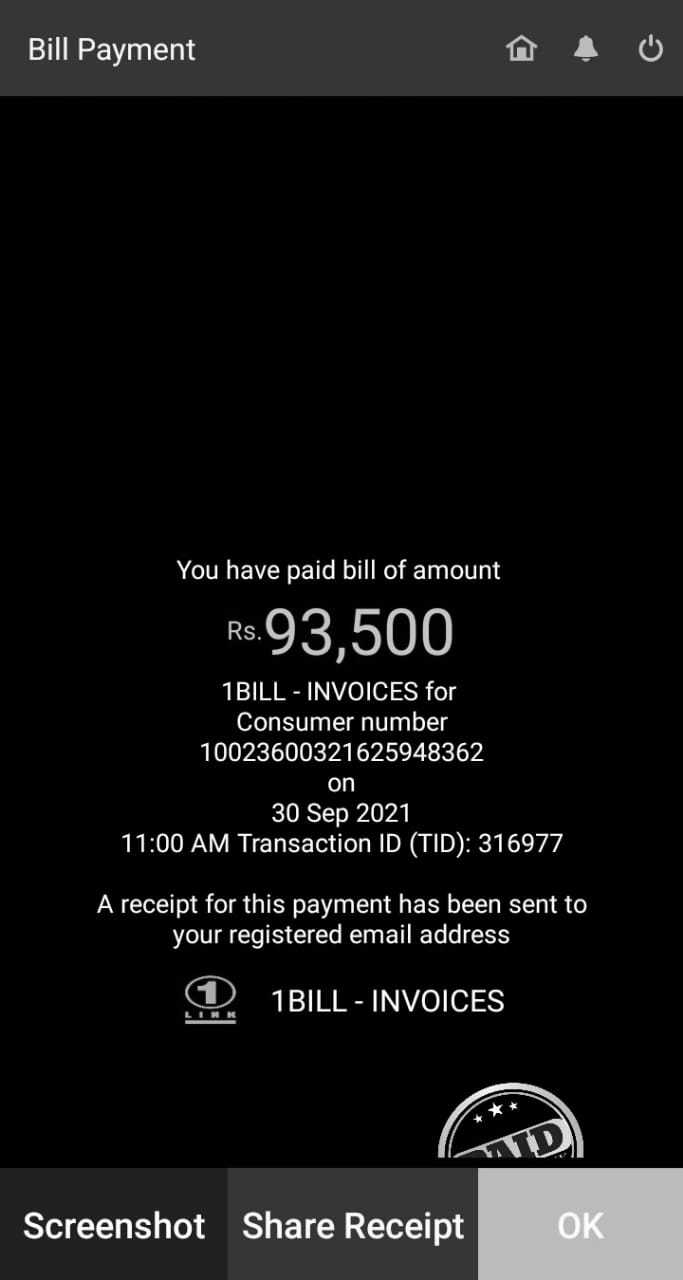

In [ ]:
img=cv2.imread('WhatsApp Image 2021-10-10 at 2.30.02 PM.jpeg')
cv2_imshow(img)

grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#cv2_imshow(img)
# canny=cv2.Canny(img,100,200)
# dilate=cv2.dilate(canny,kernel,iterations=1)
# erode=cv2.erode(dilate,kernel,iterations=1)
ret,thresh=cv2.threshold(grey,255,2)
cv2_imshow(thresh)

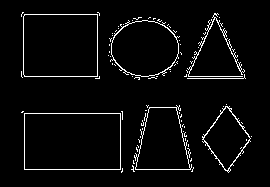

In [ ]:
canny= cv2.Canny(img,150,200)
cv2_imshow(canny)

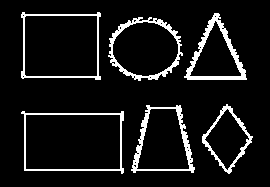

In [ ]:

kernel=np.ones((2,2),np.uint8)
dilate=cv2.dilate(canny,kernel,iterations=1)
cv2_imshow(dilate)

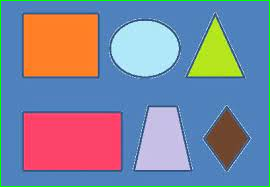

In [ ]:
# erode = cv2.erode(dilate,kernel,iterations=1)
# cv2_imshow(erode)


img=cv2.imread('shapes1.jpg')
grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#cv2_imshow(img)
# canny=cv2.Canny(img,100,200)
# dilate=cv2.dilate(canny,kernel,iterations=1)
# erode=cv2.erode(dilate,kernel,iterations=1)
ret,thresh=cv2.threshold(grey,50,255,2)
contour,h=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for cont in contour:
  approx=cv2.approxPolyDP(cont,0.01*cv2.arcLength(cont,True),True)
  # n=(len(approx))
  # if n>4:
  cv2.drawContours(img,[cont],0,(0,255,0),1)
cv2_imshow(img)


# img=cv2.imread(erode)
# cv2_imshow(img)

In [ ]:

import face_recognition
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
!pip install face_recognition
%cd face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/face_recognition


In [ ]:
cam =cv2.VideoCapture(0)

while cam.isOpened():
    ret,frame = cam.read()
    cv2_imshow(frame)
    if ret is False:
      break


In [ ]:
 upload=files.upload()

Saving mudasir.jpeg to mudasir (1).jpeg


In [ ]:
!git clone https://github.com/misbah4064/face_recognition.git
!pip install face_recognition
%cd face_recognition

Cloning into 'face_recognition'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 5), reused 23 (delta 3), pack-reused 0
Unpacking objects: 100% (26/26), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/face_recognition/face_recognition


In [ ]:
# !pip install face_recognition
# %cd face_recognition
import face_recognition
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
from google.colab import files


face1=face_recognition.load_image_file('mudasir.jpeg')
face1_encode = face_recognition.face_encodings(face1)[0]
# face2= face_recognition.load_image_file('elon.jpg')
# face2_encode=face_recognition.face_encodings(face2)[0]

known_face =[face1_encode]
known_face_label = ['mudasir' ]

file_name='mudasir.jpeg'
unknown_image=face_recognition.load_image_file(file_name)
unknown_image_read =cv2.imread(file_name)
face_location = face_recognition.face_locations(unknown_image)
face_encoding = face_recognition.face_encodings(unknown_image , face_location)

for (top, right , bottom ,left) ,face_en in zip(face_location,face_encoding):
  matches = face_recognition.compare_faces(known_face,face_en )

  name='unknown'

  face_distance = face_recognition.face_distance(known_face , face_en)
  best_match = np.argmin(face_distance)
  if matches[best_match]:
    name=known_face_label[best_match]
  cv2.rectangle(unknown_image_read,(left,top),(right,bottom) , (0,255,0) , 2)
  cv2.putText(unknown_image_read , name , (left,top+20) , cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2, cv2.LINE_AA)
cv2_imshow(unknown_image_read)

IndexError: ignored